# Non-invasive Phenotyping for Water and Nitrogen Uptake by Deep Roots Explored using Machine Learning


In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# RadiMax Wheat 2018 and 2019

# Reading RLD data and isotope data of 2018 and 2019 experiments

In [2]:
import numpy as np
import pandas as pd

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/CLEAN_Wheat3_Full_experiment_root_length.csv")
data_June18_raw = pd.read_csv("./Data/CLEAN_Wheat4_Full_experiment_root_length.csv")
data_July18_raw = pd.read_csv("./Data/CLEAN_Wheat5_Full_experiment_root_length.csv")
isotope_data_18 = pd.read_excel("./Data/isotope_dataframe.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Breeders_15N.xlsx")

# Importing RadiMax modules for RLD data pre-processing
# Pre-Processing 2018 and 2019 RLD data

In [3]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

# Processing 2018 RL data for getting root lengths from pixels values
data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),
    Square_root=True,
)

# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=True,
)

In [4]:
n = 10  # Number of intervals for computation of RL 2018
Soil_depth_range_18 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May18["soil_depth"].min(),
                data_June18["soil_depth"].min(),
                data_July18["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May18["soil_depth"].max(),
                data_June18["soil_depth"].max(),
                data_July18["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_18 = Soil_depth_range_18.astype(int)

In [5]:
Soil_depth_range_18

array([119, 129, 140, 150, 160, 170, 180, 190, 200, 210, 220])

In [6]:
n = 10  # Number of intervals for computation of RL 2019
Soil_depth_range_19 = np.floor(
    np.linspace(
        start=np.max(
            [
                data_May19["soil_depth"].min(),
                data_June19["soil_depth"].min(),
                data_July19["soil_depth"].min(),
            ]
        ),
        stop=np.min(
            [
                data_May19["soil_depth"].max(),
                data_June19["soil_depth"].max(),
                data_July19["soil_depth"].max(),
            ]
        )
        + 1,
        num=n + 1,
    )
)
Soil_depth_range_19 = Soil_depth_range_19.astype(int)

# Computation Root Lengths at Different Soil Layers in  2018

In [7]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
# Computation Root Lengths at Different Soil Layers in  2018
RL_May18, _ = fun_RL_computation(
    data_May18.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June18, _ = fun_RL_computation(
    data_June18.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July18, Intervals = fun_RL_computation(
    data_July18.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

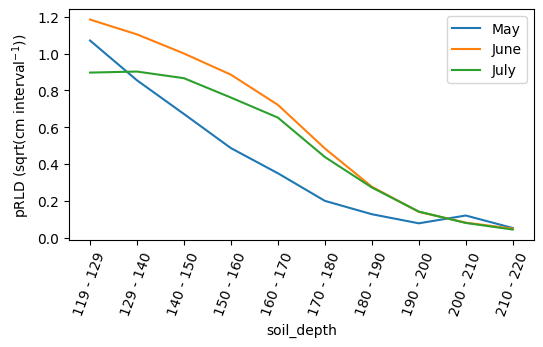

In [16]:
plot_RL(
    RL_May18, RL_June18, RL_July18, Intervals, n
)  #  Transformed data: Square root= True


In [10]:
# Computation Root Lengths in Different Soil Layers in 2019
RL_May19, _ = fun_RL_computation(
    data_May19.copy(), "RL_May_SD_", n, Soil_depth_range_18
)
RL_June19, _ = fun_RL_computation(
    data_June19.copy(), "RL_June_SD_", n, Soil_depth_range_18
)
RL_July19, Intervals = fun_RL_computation(
    data_July19.copy(), "RL_July_SD_", n, Soil_depth_range_18
)

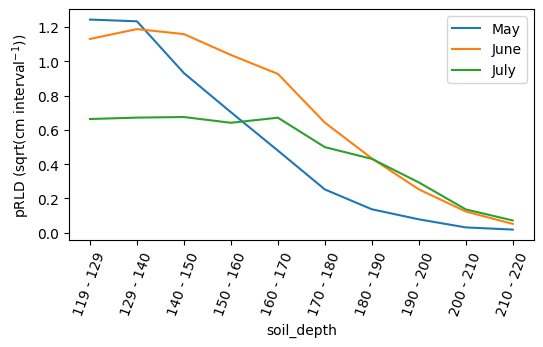

In [11]:
plot_RL(
    RL_May19, RL_June19, RL_July19, Intervals, n
)  #  #  Transformed data: Square root= True

In [12]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_18 = RL_May18.merge(RL_June18, on="row").merge(RL_July18, on="row")

In [13]:
# Merging of all average RL into a single DataFrame by Tube number
RL_Interval_19 = RL_May19.merge(RL_June19, on="row").merge(RL_July19, on="row")

In [14]:
isotope_data_tube18 = isotope_data_preprocess(isotope_data_18.copy(), 2018)

In [15]:
isotope_data_tube19 = isotope_data_preprocess(isotope_data_19.copy(), 2019, side="Both")

In [18]:
# Merging the RLD with isotope data on tube side of Bed 1 and Bed 2
RL_Isotope_Interval_18 = pd.merge(RL_Interval_18, isotope_data_tube18, on="row")
RL_Isotope_Interval_18.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_18.dropna(inplace=True)
RL_Isotope_Interval_18.to_csv("./RL_Interval_data/df_18_Square_root.csv")

In [19]:
RL_Isotope_Interval_18

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",x,bed,Delta_15N,Delta_13C,Log_Delta_15N
0,0.872903,0.482813,0.238575,0.082160,0.072993,0.096735,0.205714,0.181736,0.119734,0.051810,...,0.210213,0.185250,0.149169,0.087449,0.201330,1101,1,1.713046,-24.518905,0.538273
1,0.675988,0.937370,0.391708,0.000000,0.012674,0.020822,0.093967,0.022864,0.119734,0.051810,...,0.000000,0.089406,0.058928,0.000000,0.025394,1102,1,1.215484,-24.813728,0.195143
2,0.466605,0.865015,0.654437,0.090424,0.117596,0.000000,0.026946,0.000000,0.119734,0.051810,...,0.000000,0.094665,0.076116,0.000000,0.057777,1103,1,2.525698,-24.378695,0.926517
3,0.980977,0.727154,0.492139,0.000000,0.014371,0.000000,0.000000,0.048621,0.119734,0.051810,...,0.034383,0.039437,0.037337,0.000000,0.076502,1104,1,2.222993,-25.357771,0.798855
4,0.682960,1.237536,1.326456,0.556002,0.053984,0.005389,0.000000,0.073902,0.119734,0.051810,...,0.143533,0.000000,0.000000,0.125112,0.000000,1105,1,5.704717,-25.992775,1.741293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1.267755,1.098852,0.743789,0.477189,1.051263,0.383406,0.090651,0.120730,0.140934,0.012674,...,0.895890,0.499978,0.183449,0.119553,0.109466,2244,2,208.269947,-28.017986,5.338835
280,1.070932,0.854555,0.671495,0.486022,0.349331,0.199325,0.126816,0.077322,0.119734,0.051810,...,0.792787,0.549650,0.000000,0.095101,0.093831,2245,2,257.276033,-27.378227,5.550150
281,1.315934,0.870163,1.016310,0.514637,0.503844,0.469269,0.000000,0.000000,0.000000,0.030821,...,0.489519,0.247729,0.050788,0.052803,0.000000,2246,2,35.373231,-27.424476,3.565955
282,2.044900,1.224438,0.997720,0.265658,0.325922,0.462160,0.049392,0.110104,0.143769,0.035101,...,0.563067,0.000000,0.085564,0.130104,0.019476,2247,2,202.782910,-27.104056,5.312136


In [20]:
RL_Isotope_Interval_19 = pd.merge(RL_Interval_19, isotope_data_tube19, on="row")
RL_Isotope_Interval_19.drop(["row", "ID"], axis=1, inplace=True)
# Removing the missing values
RL_Isotope_Interval_19.dropna(inplace=True)
RL_Isotope_Interval_19.to_csv("./RL_Interval_data/df_19_Square_root.csv")

In [21]:
RL_Isotope_Interval_19

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",x,bed,Delta_15N,Delta_13C,Log_Delta_15N
0,0.624412,1.052538,0.977579,0.000000,0.682658,0.343424,0.076679,0.000000,0.000000,0.050390,...,0.802671,0.320817,0.172322,0.000000,0.000000,1132,1,9.723354,-27.751447,2.274531
1,0.862045,0.960817,0.000000,0.928772,0.496552,0.000000,0.189733,0.000000,0.000000,0.000000,...,0.780297,0.133130,0.020427,0.039437,0.000000,1133,1,2.231121,-27.230851,0.802504
2,1.489196,0.850334,0.750094,0.514372,0.294653,0.421846,0.008710,0.000000,0.050036,0.000000,...,0.261803,0.256430,0.123641,0.000000,0.000000,1134,1,7.455010,-28.088868,2.008886
3,1.479468,1.400406,1.099529,0.790315,0.113998,0.000000,0.000000,0.000000,0.022207,0.000000,...,0.584293,0.102321,0.000000,0.000000,0.000000,1135,1,3.322832,-28.171810,1.200818
4,1.255958,1.048979,0.920631,0.616866,0.200313,0.000000,0.202704,0.027544,0.000000,0.028003,...,0.138262,0.109526,0.154893,0.012318,0.025845,1136,1,2.519944,-27.718919,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1.599805,1.847675,0.841763,0.005389,0.069681,0.000000,0.145968,0.000000,0.000000,0.000000,...,0.100639,0.106403,0.100261,0.000000,0.000000,2215,2,29.287565,-28.662173,3.377163
207,1.404200,1.360117,1.417743,0.250918,0.523401,0.000000,0.000000,0.000000,0.010668,0.013772,...,0.036954,0.000000,0.000000,0.063111,0.031424,2216,2,18.457427,-28.229561,2.915467
208,2.380930,1.832748,1.338264,1.451628,0.970083,0.326619,0.194541,0.030795,0.000000,0.000000,...,0.878977,0.797496,0.701274,0.524474,0.158389,2217,2,63.746254,-28.283105,4.154910
209,1.504494,1.376592,1.388258,0.828533,0.283529,0.008710,0.000000,0.000000,0.015086,0.000000,...,0.125690,0.221782,0.031405,0.000000,0.172326,2218,2,23.919325,-29.106020,3.174687


In [17]:
import numpy as np
import pandas as pd

# Reading rootpainter's data and isotope data of 2018 and 2019 experiments
data_May18_raw = pd.read_csv("./Data/CLEAN_Wheat3_Full_experiment_root_length.csv")
data_June18_raw = pd.read_csv("./Data/CLEAN_Wheat4_Full_experiment_root_length.csv")
data_July18_raw = pd.read_csv("./Data/CLEAN_Wheat5_Full_experiment_root_length.csv")
isotope_data_18 = pd.read_excel("./Data/isotope_dataframe.xlsx")

data_May19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_May19.csv")
data_June19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_June19.csv")
data_July19_raw = pd.read_csv("./Data/RadiMax_Wheat_Root_Data_CLEAN_July19.csv")
isotope_data_19 = pd.read_excel("./Data/Breeders_15N.xlsx")

In [18]:
# Importing RadiMax modules for RLD data preprocessing
from RadiMaxDataPreProcessing import (
    RL_processing,
    fun_RL_computation,
    isotope_data_preprocess,
    plot_RL,
)

# Processing 2018 RL data for getting root lengths from pixels values
data_May18, data_June18, data_July18 = RL_processing(
    data_May18_raw.copy(),
    data_June18_raw.copy(),
    data_July18_raw.copy(),
    Square_root=True,
)

# Processing 2019 RL data for getting root lengths from pixels values
data_May19, data_June19, data_July19 = RL_processing(
    data_May19_raw.copy(),
    data_June19_raw.copy(),
    data_July19_raw.copy(),
    Square_root=True,
)

In [19]:
#Droping missing Values [np.nan, np.inf, -np.inf]
import warnings
warnings.filterwarnings("ignore")

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data_May18_RL=data_May18.loc[:,['tube','Root_length','soil_depth']]
data_June18_RL=data_June18.loc[:,['tube','Root_length','soil_depth']]
data_July18_RL=data_July18.loc[:,['tube','Root_length','soil_depth']]
data_May18_RL=clean_dataset(data_May18_RL)
data_June18_RL=clean_dataset(data_June18_RL)
data_July18_RL=clean_dataset(data_July18_RL)

Tube No: 2


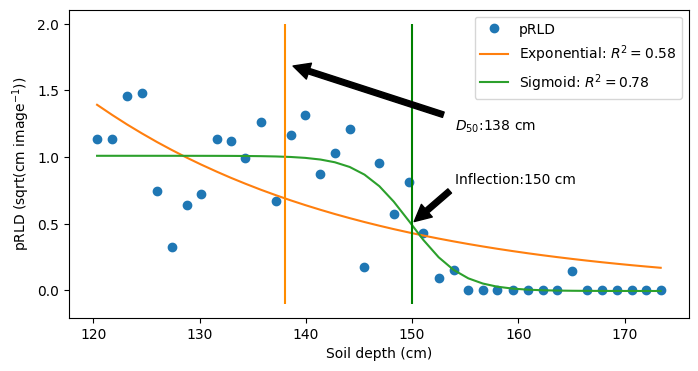

In [20]:

import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
import numpy as np
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

from RadiMaxRootDepth import func_exp,sigmoid,sigmoid_initial_Infle_point,count_consecutive

# Specify month for display results of curve fitting 
data=data_June18_RL.copy()
data.tube=data.tube.astype(int)
for i in [2]:    
    temp1 = data[data.tube==i].sort_values(by='soil_depth')
    x=temp1['soil_depth']
    y=temp1['Root_length'] 
    indx,count=count_consecutive(y, 'zero')
    if count>=6:
        y=np.array(y[0:indx+6].values)
        x=np.array(x[0:indx+6].values)
        temp1=pd.DataFrame([])
        temp1['soil_depth']=x
        temp1['Root_length']=y
        temp1.reset_index(drop=True,inplace=True)
        temp1.dropna(inplace=True)      
        x=pd.Series(x)     
        
    #y=np.sqrt(y) # For square root of RL
    x = (x- x.values[0])/(x.values[-1] - x.values[0])   # normalize    
    print(f'Tube No: {i}')

    popt, pcov =curve_fit(func_exp, x, y,p0=[1,0.1,.11] ,bounds=(0, (np.inf, np.inf, np.inf)),method='trf')
    a, tau,c= popt
    y_fit = func_exp(x, a, tau,c)
    y_pred = func_exp(x, *popt)
    SR1= r2_score(y, y_pred)
 
    #Half-life of Exponentail Decay function 
    xph=np.log(2)/tau    
    #fig, axs = plt.subplots(1, 2)
    fig, ax = plt.subplots(figsize=(8, 4))
    xp_actual=int(round(xph*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
    #half_life=np.append(half_life,xp_actual)
   # a_exp_avg=np.append(a_exp_avg,a)
   # tau_exp_avg=np.append(tau_exp_avg,tau)
    a=round(a,2)
    tau=round(tau,2)
    ss=str(np.round(xp_actual,1))+" cm"
    xp_lav=round(x*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],2)   
    #xi=sigmoid_initial_Infle_point(x,y) 
    args, cov =curve_fit(sigmoid, x, y,p0=[0.52,5,2,.01],maxfev=10000000,ftol=1e-08, xtol=1e-08,gtol=.00001) 
    x0_sig_inflec,b_sig,L,c=args    
    y_pred = sigmoid(x, *args)
    SR2=r2_score(y, y_pred)
    x0_sig_inflec_actual=int(round(x0_sig_inflec*(temp1['soil_depth'].values[-1] - temp1['soil_depth'].values[0])+ temp1['soil_depth'].values[0],0))
    s=str(x0_sig_inflec_actual)+" cm"
    ax.plot(xp_lav, y, 'o',xp_lav, y_fit, xp_lav, sigmoid(x, *args),'-')
    ax.set_prop_cycle(color=['red', 'green', 'blue'])
    
    ax.vlines(x=xp_actual, ymin=-0.1, ymax=int(y.max()+1),color='darkorange')
    ax.annotate(r'$D_{50}$:'+ss, xy=(xp_actual, func_exp(xph, a, tau,c)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2+.2),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.annotate('Inflection:'+s, xy=(x0_sig_inflec_actual, sigmoid(x0_sig_inflec,x0_sig_inflec,b_sig,L,c)), xytext=(x0_sig_inflec_actual+4, int(y.max()+1)/2-.2),
                 arrowprops=dict(facecolor='black', shrink=0.05))
   #ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='red')
    ax.vlines(x=x0_sig_inflec_actual, ymin=-0.1, ymax=int(y.max()+1),color='green')
    ax.legend(['pRLD',r'Exponential: $R^{2}=$'+str(np.round(SR1,2)),r'Sigmoid: $R^{2}=$'+str(np.round(SR2,2))])
  #  plt.title('June 2018: Tube No. '+ str(i))

    ax.set_xlabel('Soil depth (cm)')
    ax.set_ylabel(r'pRLD (sqrt(cm image$^{-1}$))')
  
    plt.show()
     # Save each figure as a pdf file.




# Facility Position Correction


In [3]:
import pandas as pd

RL_Isotope_Interval_18 = pd.read_csv(
    "./RL_Interval_data/df_18_Square_root.csv", index_col="Unnamed: 0"
)
df = RL_Isotope_Interval_18
dfb1 = df[df.bed == 1]  # Bed 1

Text(0, 0.5, 'log$\\delta15N$')

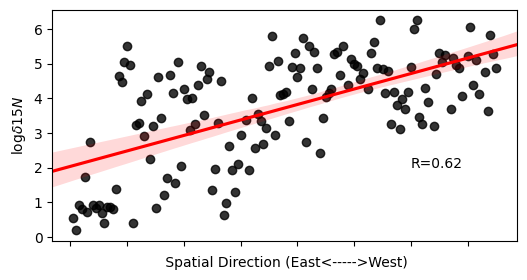

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    1220,
    2,
    "R=" + str(round(r_value, 2)),
    horizontalalignment="left",
    size="medium",
    color="black",
)

handel = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
handel.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"log$\delta15N$")

In [22]:
dfb2 = df[df.bed == 2]  # For Bed 2

Text(0, 0.5, 'Log($\\delta^{15}N$)')

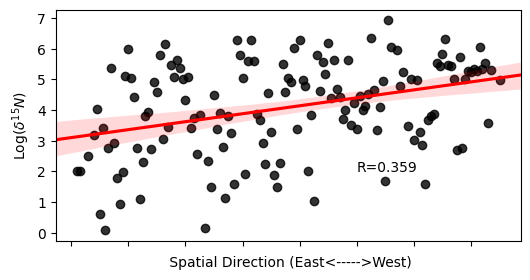

In [23]:
dfb1 = dfb2
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    dfb1["x"], dfb1["Log_Delta_15N"]
)
plt.text(
    2200,
    2,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
g1 = sns.regplot(
    x=dfb1["x"],
    y=dfb1["Log_Delta_15N"],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
g1.set(xticklabels=[])  # remove the tick labels
# plt.xticks(color='white')
plt.xlabel(" Spatial Direction (East<----->West)")
plt.ylabel(r"Log($\delta^{15}N$)")

In [26]:
from RadiMaxML import SpatialCorrection

DF_18_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_18.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [27]:
DF_18_Raw_spatial_corrected_L

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N,bed,x
0,-0.009403,-0.375129,-0.242103,-0.087777,-0.028065,0.067146,0.186183,0.169304,-0.013951,-0.004196,...,0.104639,0.172089,0.180110,0.067337,0.194635,-11.064499,0.984011,-1.520368,1,1101
1,-0.209413,0.078605,-0.092336,-0.174529,-0.091907,-0.011140,0.073167,0.009765,-0.013443,-0.004069,...,-0.109425,0.073270,0.088039,-0.020557,0.018453,-12.613160,0.702710,-1.885794,1,1102
2,-0.421891,0.005427,0.167026,-0.088698,0.009492,-0.034336,0.004878,-0.013767,-0.012936,-0.003942,...,-0.113275,0.075554,0.103398,-0.021002,0.050589,-12.354046,1.151266,-1.176714,1,1103
3,0.089385,-0.133258,0.001362,-0.183713,-0.097256,-0.036709,-0.023335,0.034186,-0.012429,-0.003815,...,-0.082741,0.017351,0.062789,-0.021447,0.069067,-13.707850,0.185713,-1.326672,1,1104
4,-0.211727,0.376300,0.832312,0.367697,-0.061166,-0.033694,-0.024603,0.058799,-0.011922,-0.003688,...,0.022559,-0.025061,0.023622,0.103220,-0.007681,-11.277226,-0.435768,-0.406529,1,1105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.096622,0.139264,0.048284,-0.033580,0.579062,0.093818,-0.123996,-0.014446,-0.074238,-0.083831,...,0.271666,0.028120,-0.108680,-0.058328,0.003594,7.124155,-1.218281,0.366751,2,2244
280,-0.101825,-0.107312,-0.024985,-0.025311,-0.124699,-0.091590,-0.088848,-0.058453,-0.096459,-0.045263,...,0.166796,0.075701,-0.293660,-0.083788,-0.012653,55.182932,-0.574820,0.565086,2,2245
281,0.141554,-0.093983,0.318853,0.002740,0.027986,0.177028,-0.216680,-0.136373,-0.217214,-0.066820,...,-0.138238,-0.228311,-0.244401,-0.127096,-0.107096,-167.667178,-0.617366,-1.432087,2,2246
282,0.868896,0.258013,0.299287,-0.246801,-0.151765,0.168591,-0.168305,-0.026867,-0.074466,-0.063109,...,-0.066457,-0.478131,-0.211156,-0.050803,-0.088232,-1.204809,-0.293244,0.301115,2,2247


In [28]:
DF_18_Raw_spatial_corrected_L.to_csv("DF_18_Raw_spatial_corrected_L.csv")

In [29]:
DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

In [30]:
DF_18_Raw_spatial_corrected_L.iloc[:, 0:-2]

,"RL_May_SD_(119, 129]","RL_May_SD_(129, 140]","RL_May_SD_(140, 150]","RL_May_SD_(150, 160]","RL_May_SD_(160, 170]","RL_May_SD_(170, 180]","RL_May_SD_(180, 190]","RL_May_SD_(190, 200]","RL_May_SD_(200, 210]","RL_May_SD_(210, 220]",...,"RL_July_SD_(150, 160]","RL_July_SD_(160, 170]","RL_July_SD_(170, 180]","RL_July_SD_(180, 190]","RL_July_SD_(190, 200]","RL_July_SD_(200, 210]","RL_July_SD_(210, 220]",Delta_15N,Delta_13C,Log_Delta_15N
0,-0.009403,-0.375129,-0.242103,-0.087777,-0.028065,0.067146,0.186183,0.169304,-0.013951,-0.004196,...,-0.314907,-0.014333,0.104639,0.172089,0.180110,0.067337,0.194635,-11.064499,0.984011,-1.520368
1,-0.209413,0.078605,-0.092336,-0.174529,-0.091907,-0.011140,0.073167,0.009765,-0.013443,-0.004069,...,-0.288751,-0.266672,-0.109425,0.073270,0.088039,-0.020557,0.018453,-12.613160,0.702710,-1.885794
2,-0.421891,0.005427,0.167026,-0.088698,0.009492,-0.034336,0.004878,-0.013767,-0.012936,-0.003942,...,-0.278813,-0.106571,-0.113275,0.075554,0.103398,-0.021002,0.050589,-12.354046,1.151266,-1.176714
3,0.089385,-0.133258,0.001362,-0.183713,-0.097256,-0.036709,-0.023335,0.034186,-0.012429,-0.003815,...,-0.209570,-0.241173,-0.082741,0.017351,0.062789,-0.021447,0.069067,-13.707850,0.185713,-1.326672
4,-0.211727,0.376300,0.832312,0.367697,-0.061166,-0.033694,-0.024603,0.058799,-0.011922,-0.003688,...,0.555229,0.092336,0.022559,-0.025061,0.023622,0.103220,-0.007681,-11.277226,-0.435768,-0.406529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.096622,0.139264,0.048284,-0.033580,0.579062,0.093818,-0.123996,-0.014446,-0.074238,-0.083831,...,-0.314597,0.500193,0.271666,0.028120,-0.108680,-0.058328,0.003594,7.124155,-1.218281,0.366751
280,-0.101825,-0.107312,-0.024985,-0.025311,-0.124699,-0.091590,-0.088848,-0.058453,-0.096459,-0.045263,...,0.045954,0.060444,0.166796,0.075701,-0.293660,-0.083788,-0.012653,55.182932,-0.574820,0.565086
281,0.141554,-0.093983,0.318853,0.002740,0.027986,0.177028,-0.216680,-0.136373,-0.217214,-0.066820,...,0.275331,0.098653,-0.138238,-0.228311,-0.244401,-0.127096,-0.107096,-167.667178,-0.617366,-1.432087
282,0.868896,0.258013,0.299287,-0.246801,-0.151765,0.168591,-0.168305,-0.026867,-0.074466,-0.063109,...,-0.036196,0.389884,-0.066457,-0.478131,-0.211156,-0.050803,-0.088232,-1.204809,-0.293244,0.301115


In [ ]:
import pandas as pd
from RadiMaxML import Feature_Importances_OLD

LDF_Raw_Full_test_r, Fim_raw = Feature_Importances_OLD(
    DF_18_Raw_spatial_corrected_L.iloc[:, 0:-2]
)

In [33]:
import warnings

warnings.filterwarnings("ignore")

In [34]:
RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            2,
            3,
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [50, 100, 200, 300, 500, 1000],
        "max_features": [3, 5, 10, 20, None],  # If None, then max_features=n_features.
    }
]

# Modelling on 2018 Dataset
# Random Forest using nested cross-validation

In [57]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, "auto"],  # If None, then max_features=n_features.
    }
]

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200, 300, 500, 1000],
        "max_features": [10, 20, None],  # If None, then max_features=n_features.
    }
]

# Calling Random forest 
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Fold 0, R train 0.88 test 0.43
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 1, R train 0.96 test 0.28
{'max_depth': 5, 'max_features': 10, 'n_estimators': 300}
Fold 2, R train 0.88 test 0.25
{'max_depth': 5, 'max_features': 10, 'n_estimators': 300}
Fold 3, R train 0.88 test 0.25
{'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Fold 4, R train 0.88 test 0.08
Full test r 0.22
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': 10, 'n_estimators': 1000}
Fold 0, R train 0.88 test 0.53
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 1, R train 0.88 test 0.57
{'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Fold 2, R train 0.88 test 0.36
{'max_depth': 10, 'max_features': None, 'n_estimators': 200}
Fold 3, R train 0.97 test 0.42
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 4, R train 0.89 test 0.35
Full test r 0.46
 
Delta_13C RF
{'max_depth': 15, 'max

In [58]:
LDF_Raw_Full_test_r

,RF
Delta_15N,0.218789
Log_Delta_15N,0.456264
Delta_13C,0.410248


In [24]:
LDF_Raw_Full_test_r

,RF
Delta_15N,0.220696
Log_Delta_15N,0.450757
Delta_13C,0.411632


In [59]:
pval

,RF
Delta_15N,2.024421e-04
Log_Delta_15N,5.225978e-16
Delta_13C,5.904283e-13


In [28]:
pval

,RF
Delta_15N,1.774304e-04
Log_Delta_15N,1.283236e-15
Delta_13C,4.852793e-13


In [61]:
Fim_raw.to_csv('FeatureImp2018.csv')

In [62]:
col = DF_18_Raw_spatial_corrected_L.iloc[:, 0:-5].columns
col

Index(['RL_May_SD_(119, 129]', 'RL_May_SD_(129, 140]', 'RL_May_SD_(140, 150]',
       'RL_May_SD_(150, 160]', 'RL_May_SD_(160, 170]', 'RL_May_SD_(170, 180]',
       'RL_May_SD_(180, 190]', 'RL_May_SD_(190, 200]', 'RL_May_SD_(200, 210]',
       'RL_May_SD_(210, 220]', 'RL_June_SD_(119, 129]',
       'RL_June_SD_(129, 140]', 'RL_June_SD_(140, 150]',
       'RL_June_SD_(150, 160]', 'RL_June_SD_(160, 170]',
       'RL_June_SD_(170, 180]', 'RL_June_SD_(180, 190]',
       'RL_June_SD_(190, 200]', 'RL_June_SD_(200, 210]',
       'RL_June_SD_(210, 220]', 'RL_July_SD_(119, 129]',
       'RL_July_SD_(129, 140]', 'RL_July_SD_(140, 150]',
       'RL_July_SD_(150, 160]', 'RL_July_SD_(160, 170]',
       'RL_July_SD_(170, 180]', 'RL_July_SD_(180, 190]',
       'RL_July_SD_(190, 200]', 'RL_July_SD_(200, 210]',
       'RL_July_SD_(210, 220]'],
      dtype='object')

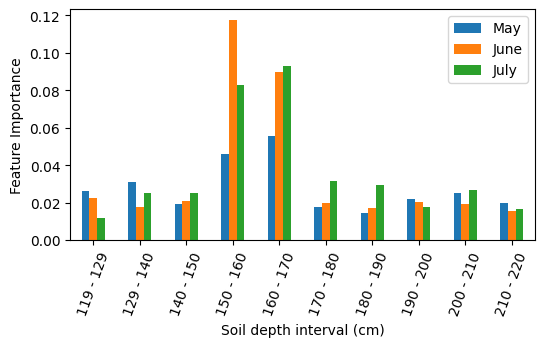

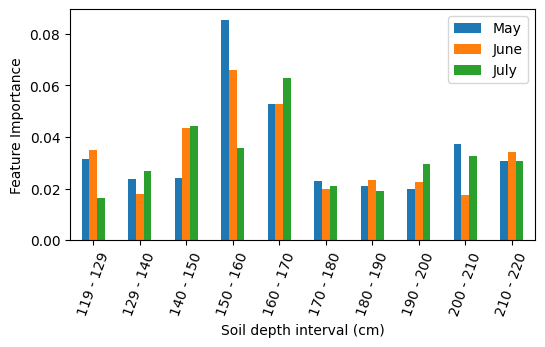

In [66]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    
    Intervals=[str(119)+str(' - ')+str(129), str(129)+str(' - ')+str(140), str(140)+str(' - ')+str(150), str(150)+str(' - ')+str(160), str(160)+str(' - ')+str(170),
                  str(170)+str(' - ')+str(180), str(180)+str(' - ')+str(190), str(190)+str(' - ')+str(200), str(200)+str(' - ')+str(210), str(210)+str(' - ')+str(220)]
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    plt.xlabel('Soil depth interval (cm)')
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

# Feature Importance of Root Distributions for predicting Isotope measurements 

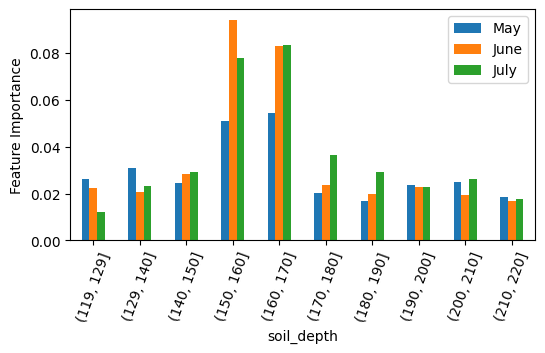

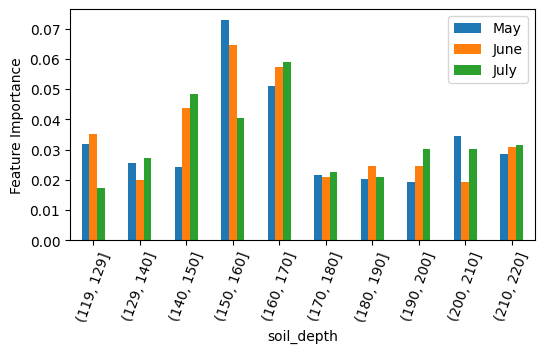

In [39]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

In [29]:
import pandas as pd
from RadiMaxML import ML_NCV   #ML_NCV is our RAdiMax ML module

DF_18_Raw_spatial_corrected_L = pd.read_csv(
    "DF_18_Raw_spatial_corrected_L.csv", index_col="Unnamed: 0"
)

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, "auto"],  # If None, then max_features=n_features.
    }
]

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
            15,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [200, 300, 500, 1000],
        "max_features": [5,10, 20, None],  # If None, then max_features=n_features.
    }
]

# Calling Random forest 
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 1000}
Fold 0, R train 0.87 test 0.47
{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
Fold 1, R train 0.87 test 0.32
{'max_depth': 5, 'max_features': 5, 'n_estimators': 300}
Fold 2, R train 0.88 test 0.28
{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
Fold 3, R train 0.87 test 0.28
{'max_depth': 5, 'max_features': 5, 'n_estimators': 1000}
Fold 4, R train 0.89 test 0.08
Full test r 0.24
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
Fold 0, R train 0.86 test 0.57
{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
Fold 1, R train 0.87 test 0.56
{'max_depth': 5, 'max_features': 5, 'n_estimators': 300}
Fold 2, R train 0.87 test 0.39
{'max_depth': 5, 'max_features': 20, 'n_estimators': 300}
Fold 3, R train 0.88 test 0.40
{'max_depth': 5, 'max_features': 5, 'n_estimators': 300}
Fold 4, R train 0.87 test 0.35
Full test r 0.46
 
Delta_13C RF
{'max_depth': 5, 'max_features': 5

# Gradient Boosting using nested cross-validation

In [54]:
# Gradient Boosting Algorithm

import warnings
warnings.filterwarnings("ignore")

GB_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10,30],  # If None, then max_features=n_features.
    }
]

LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_18_Raw_spatial_corrected_L.copy(), GB_models_param_grid, "GB"
)


 
Delta_15N GB
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test 0.32
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test 0.35
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.17
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.18
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.03
Full test r 0.18
 
Log_Delta_15N GB
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test 0.50
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test 0.41
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.33
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.42
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.38
Full test r 0.41
 
Delta_13C GB
{'max_depth': 10, 'max_features'

# Performance metric: Correlation 

In [50]:
LDF_Raw_Full_test_r

,GB
Delta_15N,0.197360
Log_Delta_15N,0.391494
Delta_13C,0.387143


# Modelling on 2019 Dataset

In [40]:
from RadiMaxML import SpatialCorrection

DF_19_Raw_spatial_corrected_L = SpatialCorrection(
    RL_Isotope_Interval_19.copy(), "L"
)  # L for Linear


 Linear correction: Done


# Random Forest using nested cross-validation

In [66]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

# DF_18_Raw_spatial_corrected_L=pd.read_csv('DF_18_Raw_spatial_corrected_L.csv',index_col='Unnamed: 0')

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, "auto"],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 0.89 test -0.02
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 0.89 test 0.20
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 0.88 test 0.25
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 0.98 test 0.07
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 0.91 test 0.31
Full test r 0.14
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 0.91 test 0.10
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 0.99 test 0.06
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 0.99 test 0.34
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 3, R train 0.94 test 0.05
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 4, R train 0.92 test 0.20
Full test r 0.13
 
Delta_13C RF
{'max_depth': 5, 'max_features':

# Performance metric: Correlation 

In [69]:
LDF_Raw_Full_test_r

,RF
Delta_15N,0.141939
Log_Delta_15N,0.132424
Delta_13C,0.039350


# p-values of above correlations

In [71]:
pval

,RF
Delta_15N,0.039401
Log_Delta_15N,0.054780
Delta_13C,0.569748


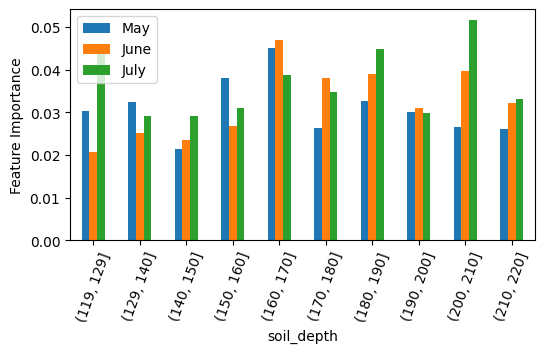

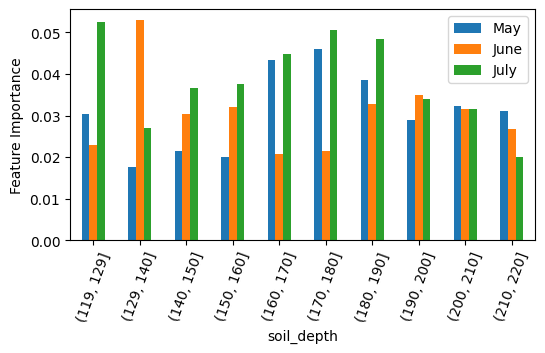

In [72]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

n = 10
feats = {}
T = ["Log_Delta_15N", "Delta_13C"]
for i in [0, 1]:
    for feature, importance in zip(col, Fim_raw.iloc[:, i + 1]):
        feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient="index").rename(
        columns={0: "reg_coeff"}
    )
    importances = importances.sort_values(by="reg_coeff", ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={"index": "Features"})
    FeaImp_May = importances.iloc[
        np.where(importances.Features.str.contains("May"))[0], :
    ].copy()
    FeaImp_June = importances.iloc[
        np.where(importances.Features.str.contains("June"))[0], :
    ].copy()
    FeaImp_July = importances.iloc[
        np.where(importances.Features.str.contains("July"))[0], :
    ].copy()
    FeaImp_May.sort_values(by="Features", inplace=True)
    FeaImp_June.sort_values(by="Features", inplace=True)
    FeaImp_July.sort_values(by="Features", inplace=True)
    # FeaImp_May.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    FeaImp_May.index = Intervals  # Define above
    FeaImp_June.index = Intervals
    FeaImp_July.index = Intervals
    # FeaImp_June.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    # FeaImp_July.index=['(119, 129]','(129, 140]','(140, 150]','(150, 160]','(160, 170]','(170, 180]','(180, 190]','(190, 200]','(200, 210]','(210, 220]']
    dfff = pd.DataFrame(
        {
            "May": FeaImp_May.reg_coeff,
            "June": FeaImp_June.reg_coeff,
            "July": FeaImp_July.reg_coeff,
        }
    )
    dfff[["May", "June", "July"]].plot(kind="bar", figsize=(6, 3))
    # plt.title('Dataset 2018:'+T[i],size=10)
    plt.xticks(rotation=70, size=10)
    plt.yticks(size=10)
    plt.grid(False)
    plt.legend(fontsize=10)
    plt.ylabel("Feature Importance", size=10)
    image_name = T[i] + "_raw.jpg"
    plt.savefig(image_name, dpi=500, bbox_inches="tight")
    plt.show()

# Gradient Boosting using nested cross-validation

In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

# DF_18_Raw_spatial_corrected_L=pd.read_csv('DF_18_Raw_spatial_corrected_L.csv',index_col='Unnamed: 0')

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10,
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [500],
        "max_features": [5, 10, 15],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    DF_19_Raw_spatial_corrected_L.copy(), RF_models_param_grid, "GB"
)

 
Delta_15N GB
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test 0.16
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test -0.13
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.12
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.02
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.29
Full test r 0.11
 
Log_Delta_15N GB
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 0, R train 1.00 test -0.03
{'max_depth': 10, 'max_features': 5, 'n_estimators': 500}
Fold 1, R train 1.00 test -0.16
{'max_depth': 5, 'max_features': 5, 'n_estimators': 500}
Fold 2, R train 1.00 test 0.24
{'max_depth': 5, 'max_features': 10, 'n_estimators': 500}
Fold 3, R train 1.00 test 0.03
{'max_depth': 10, 'max_features': 10, 'n_estimators': 500}
Fold 4, R train 1.00 test 0.30
Full test r 0.07
 
Delta_13C GB
{'max_depth': 5, 'max_f

In [63]:
LDF_Raw_Full_test_r

,GB
Delta_15N,0.111977
Log_Delta_15N,0.065844
Delta_13C,0.055939


In [64]:
pval

,GB
Delta_15N,0.104802
Log_Delta_15N,0.341202
Delta_13C,0.418879


In [7]:

SI_18_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')

SI_19_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


In [26]:
SI_19_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,ID,Log_Delta_15N
1,63.687305,125.62,136.32,161.14,75.819125,149.22,155.56,184.94,59.709073,159.93,161.76,188.06,1132,1,9.723354,-27.751447,LG_Initial,2.274531
2,65.011491,129.68,133.85,161.02,79.953771,141.43,148.09,177.08,65.742764,154.46,155.76,181.69,1133,1,2.231121,-27.230851,P1083,0.802504
3,74.654774,141.79,138.77,157.31,78.366596,148.01,147.24,171.06,55.883258,152.24,151.68,180.56,1134,1,7.455010,-28.088868,Sj_N0514,2.008886
4,90.266680,118.78,129.51,155.06,94.221109,146.08,147.63,171.55,70.077976,151.31,152.22,177.37,1135,1,3.322832,-28.171810,P0224,1.200818
5,62.703373,130.93,139.74,157.00,69.033986,159.70,155.82,170.14,54.355500,180.56,164.44,172.50,1136,1,2.519944,-27.718919,Sj_M0051,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,97.366450,158.71,150.45,164.39,102.351643,217.98,179.00,197.72,60.477098,194.86,175.20,192.92,2213,2,39.897318,-28.733370,KWS_Lili,3.686309
203,79.614777,131.98,134.30,145.01,84.723097,159.38,152.80,169.70,45.356699,152.53,151.91,170.96,2215,2,29.287565,-28.662173,Drachmann,3.377163
204,79.227962,130.67,136.35,147.37,71.587094,164.50,160.76,173.02,21.447877,105.46,117.90,121.35,2216,2,18.457427,-28.229561,Sheriff,2.915467
205,116.573418,153.73,147.28,169.47,129.099804,195.63,171.59,195.01,86.823692,232.32,189.69,206.42,2217,2,63.746254,-28.283105,P0171,4.154910


In [30]:
SI_18_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,Log_Delta_15N,ID
0,56.875639,110.94,120.39,142.99,22.172378,136.61,141.52,149.92,7.284962,146.98,148.37,150.18,1102,1,1.215484,-24.813728,0.195143,Torp
1,58.597965,113.57,122.61,145.78,21.527085,137.82,142.04,147.97,7.435804,143.32,144.33,144.76,1103,1,2.525698,-24.378695,0.926517,Informer
2,57.237844,110.53,118.78,141.08,28.118945,136.82,142.13,153.62,8.669016,149.50,150.18,150.84,1104,1,2.222993,-25.357771,0.798855,Claire
3,63.464403,130.36,136.18,155.63,39.788720,145.27,148.34,159.17,22.172860,152.47,155.66,163.73,1105,1,5.704717,-25.992775,1.741293,RW41640
4,63.839724,111.84,119.37,144.33,19.507460,135.23,138.42,145.79,6.888762,147.22,148.93,148.34,1106,1,2.058996,-24.026314,0.722218,KWS Montana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,59.970537,114.31,120.26,138.82,37.495155,145.08,150.55,162.61,16.870379,156.23,160.04,157.19,2242,2,198.124113,-26.535656,5.288894,Sj M0567
269,70.490885,115.59,126.03,151.89,40.922208,153.34,158.28,175.23,26.231639,160.75,166.31,177.74,2243,2,429.593530,-25.705704,6.062839,KWS Montana
270,88.036639,128.26,137.28,172.00,53.894609,152.58,161.31,181.68,35.438557,172.59,176.58,184.43,2244,2,208.269947,-28.017986,5.338835,Hereford
271,66.808455,129.05,137.11,164.65,48.310637,159.52,164.21,179.42,30.147397,161.56,166.41,173.45,2246,2,35.373231,-27.424476,3.565955,Sj M0564


# Checking Spatial correlation of SI in June 2018 Bed 1

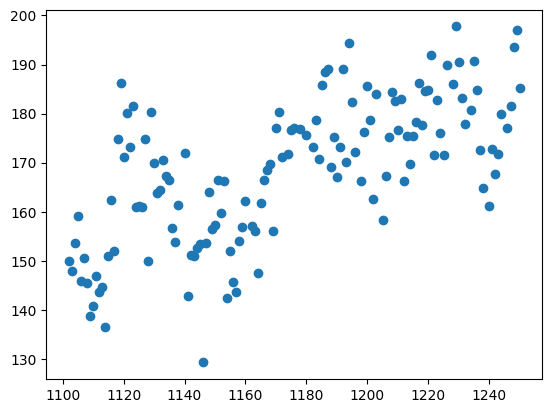

In [31]:
import matplotlib.pyplot as plt
plt.plot(SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'],SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point'],'o')

<AxesSubplot: xlabel='x', ylabel='June_Inflection_sig_point'>

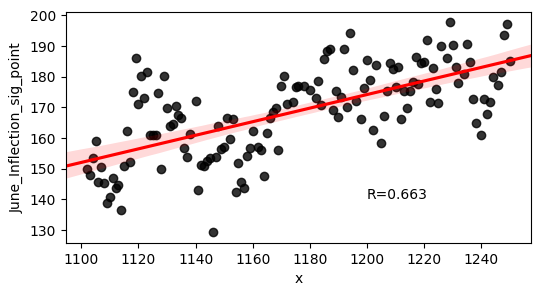

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'], SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point']
)
plt.text(
    1200,
    140,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
sns.regplot(
    x=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'],
    y=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point'],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
#handel.set(xticklabels=[])  # remove the tick labels

# Checking Spatial correlation of SI in June 2018 in Bed 2

<AxesSubplot: xlabel='x', ylabel='June_Inflection_sig_point'>

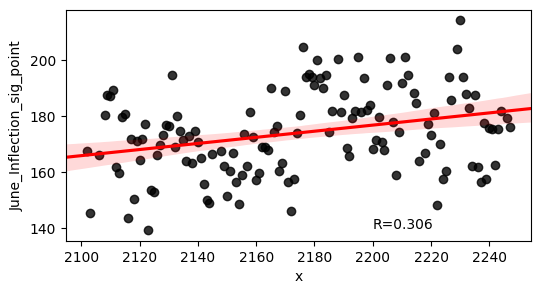

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'], SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['June_Inflection_sig_point']
)
plt.text(
    2200,
    140,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
sns.regplot(
    x=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'],
    y=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['June_Inflection_sig_point'],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
#handel.set(xticklabels=[])  # remove the tick labels

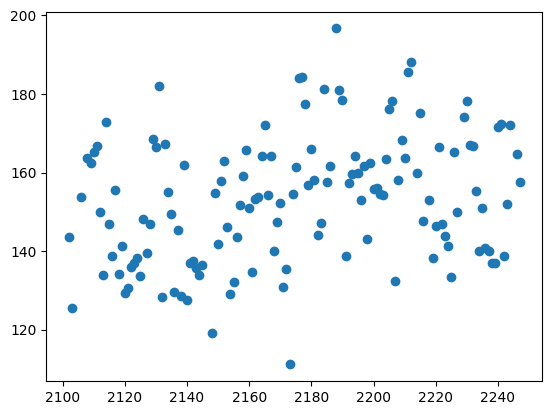

In [34]:
import matplotlib.pyplot as plt
plt.plot(SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'],SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['May_Inflection_sig_point'],'o')

In [8]:
SI_18_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)
SI_19_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)

In [9]:
from RadiMaxML import SpatialCorrection

SI_18_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_18_Raw_spatial_corrected_L.copy(), "L"
)  # L for Linear



 Linear correction: Done


In [45]:
SI_19_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)

In [46]:
SI_19_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,Log_Delta_15N
1,63.687305,125.62,136.32,161.14,75.819125,149.22,155.56,184.94,59.709073,159.93,161.76,188.06,1132,1,9.723354,-27.751447,2.274531
2,65.011491,129.68,133.85,161.02,79.953771,141.43,148.09,177.08,65.742764,154.46,155.76,181.69,1133,1,2.231121,-27.230851,0.802504
3,74.654774,141.79,138.77,157.31,78.366596,148.01,147.24,171.06,55.883258,152.24,151.68,180.56,1134,1,7.455010,-28.088868,2.008886
4,90.266680,118.78,129.51,155.06,94.221109,146.08,147.63,171.55,70.077976,151.31,152.22,177.37,1135,1,3.322832,-28.171810,1.200818
5,62.703373,130.93,139.74,157.00,69.033986,159.70,155.82,170.14,54.355500,180.56,164.44,172.50,1136,1,2.519944,-27.718919,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,97.366450,158.71,150.45,164.39,102.351643,217.98,179.00,197.72,60.477098,194.86,175.20,192.92,2213,2,39.897318,-28.733370,3.686309
203,79.614777,131.98,134.30,145.01,84.723097,159.38,152.80,169.70,45.356699,152.53,151.91,170.96,2215,2,29.287565,-28.662173,3.377163
204,79.227962,130.67,136.35,147.37,71.587094,164.50,160.76,173.02,21.447877,105.46,117.90,121.35,2216,2,18.457427,-28.229561,2.915467
205,116.573418,153.73,147.28,169.47,129.099804,195.63,171.59,195.01,86.823692,232.32,189.69,206.42,2217,2,63.746254,-28.283105,4.154910


In [10]:
SI_19_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_19_Raw_spatial_corrected_L.copy(), "L"
)  # L for Linear



 Linear correction: Done


In [21]:
SI_18_Raw_spatial_corrected_Done_ML=SI_18_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Delta_15N','Log_Delta_15N','Delta_13C','x']]

In [48]:
SI_19_Raw_spatial_corrected_Done_ML=SI_19_Raw_spatial_corrected_Done.loc[:,['May_half_life','June_half_life','July_half_life','May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Delta_15N','Log_Delta_15N','Delta_13C','x']]

# SI correlation of Table 2

In [22]:
np.round(SI_18_Raw_spatial_corrected_Done_ML.corr(),2)

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
May_half_life,1.00,0.48,0.44,0.79,0.59,0.59,0.27,0.26,-0.17,0.0
June_half_life,0.48,1.00,0.73,0.57,0.76,0.68,0.25,0.32,-0.21,0.0
July_half_life,0.44,0.73,1.00,0.49,0.69,0.70,0.26,0.31,-0.19,0.0
May_Inflection_sig_point,0.79,0.57,0.49,1.00,0.73,0.73,0.36,0.34,-0.27,-0.0
June_Inflection_sig_point,0.59,0.76,0.69,0.73,1.00,0.91,0.31,0.37,-0.30,0.0
July_Inflection_sig_point,0.59,0.68,0.70,0.73,0.91,1.00,0.34,0.39,-0.31,-0.0
Delta_15N,0.27,0.25,0.26,0.36,0.31,0.34,1.00,0.75,-0.17,-0.0
Log_Delta_15N,0.26,0.32,0.31,0.34,0.37,0.39,0.75,1.00,-0.32,-0.0
Delta_13C,-0.17,-0.21,-0.19,-0.27,-0.30,-0.31,-0.17,-0.32,1.00,0.0
x,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.0


In [ ]:
import matplotlib.pyplot as plt

In [23]:
from scipy.stats import pearsonr
import numpy as np
rho = SI_18_Raw_spatial_corrected_Done_ML.corr()
pval = SI_18_Raw_spatial_corrected_Done_ML.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
May_half_life,1.0***,0.48***,0.44***,0.79***,0.59***,0.59***,0.27***,0.26***,-0.17**,0.0
June_half_life,0.48***,1.0***,0.73***,0.57***,0.76***,0.68***,0.25***,0.32***,-0.21***,0.0
July_half_life,0.44***,0.73***,1.0***,0.49***,0.69***,0.7***,0.26***,0.31***,-0.19**,0.0
May_Inflection_sig_point,0.79***,0.57***,0.49***,1.0***,0.73***,0.73***,0.36***,0.34***,-0.27***,-0.0
June_Inflection_sig_point,0.59***,0.76***,0.69***,0.73***,1.0***,0.91***,0.31***,0.37***,-0.3***,0.0
July_Inflection_sig_point,0.59***,0.68***,0.7***,0.73***,0.91***,1.0***,0.34***,0.39***,-0.31***,-0.0
Delta_15N,0.27***,0.25***,0.26***,0.36***,0.31***,0.34***,1.0***,0.75***,-0.17**,-0.0
Log_Delta_15N,0.26***,0.32***,0.31***,0.34***,0.37***,0.39***,0.75***,1.0***,-0.32***,-0.0
Delta_13C,-0.17**,-0.21***,-0.19**,-0.27***,-0.3***,-0.31***,-0.17**,-0.32***,1.0***,0.0
x,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0***


In [40]:
SI_19_Raw_spatial_corrected_L

,May_Total_RL,May_half_life,May_inflec_FoldedNormal,May_Inflection_sig_point,June_Total_RL,June_half_life,June_inflec_FoldedNormal,June_Inflection_sig_point,July_Total_RL,July_half_life,July_inflec_FoldedNormal,July_Inflection_sig_point,x,bed,Delta_15N,Delta_13C,ID,Log_Delta_15N
1,63.687305,125.62,136.32,161.14,75.819125,149.22,155.56,184.94,59.709073,159.93,161.76,188.06,1132,1,9.723354,-27.751447,LG_Initial,2.274531
2,65.011491,129.68,133.85,161.02,79.953771,141.43,148.09,177.08,65.742764,154.46,155.76,181.69,1133,1,2.231121,-27.230851,P1083,0.802504
3,74.654774,141.79,138.77,157.31,78.366596,148.01,147.24,171.06,55.883258,152.24,151.68,180.56,1134,1,7.455010,-28.088868,Sj_N0514,2.008886
4,90.266680,118.78,129.51,155.06,94.221109,146.08,147.63,171.55,70.077976,151.31,152.22,177.37,1135,1,3.322832,-28.171810,P0224,1.200818
5,62.703373,130.93,139.74,157.00,69.033986,159.70,155.82,170.14,54.355500,180.56,164.44,172.50,1136,1,2.519944,-27.718919,Sj_M0051,0.924237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,97.366450,158.71,150.45,164.39,102.351643,217.98,179.00,197.72,60.477098,194.86,175.20,192.92,2213,2,39.897318,-28.733370,KWS_Lili,3.686309
203,79.614777,131.98,134.30,145.01,84.723097,159.38,152.80,169.70,45.356699,152.53,151.91,170.96,2215,2,29.287565,-28.662173,Drachmann,3.377163
204,79.227962,130.67,136.35,147.37,71.587094,164.50,160.76,173.02,21.447877,105.46,117.90,121.35,2216,2,18.457427,-28.229561,Sheriff,2.915467
205,116.573418,153.73,147.28,169.47,129.099804,195.63,171.59,195.01,86.823692,232.32,189.69,206.42,2217,2,63.746254,-28.283105,P0171,4.154910


In [49]:
from scipy.stats import pearsonr
import numpy as np
rho = SI_19_Raw_spatial_corrected_Done_ML.corr()
pval = SI_19_Raw_spatial_corrected_Done_ML.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
rho.round(2).astype(str) + p

,May_half_life,June_half_life,July_half_life,May_Inflection_sig_point,June_Inflection_sig_point,July_Inflection_sig_point,Delta_15N,Log_Delta_15N,Delta_13C,x
May_half_life,1.0***,0.58***,0.5***,0.69***,0.39***,0.42***,0.16*,0.17*,-0.01,0.0
June_half_life,0.58***,1.0***,0.59***,0.41***,0.64***,0.44***,0.18**,0.17*,0.13,0.0
July_half_life,0.5***,0.59***,1.0***,0.38***,0.46***,0.55***,0.19**,0.18**,0.08,0.0
May_Inflection_sig_point,0.69***,0.41***,0.38***,1.0***,0.54***,0.49***,0.17*,0.15*,-0.02,0.0
June_Inflection_sig_point,0.39***,0.64***,0.46***,0.54***,1.0***,0.71***,0.13,0.17*,0.06,0.0
July_Inflection_sig_point,0.42***,0.44***,0.55***,0.49***,0.71***,1.0***,0.21**,0.24***,0.12,-0.0
Delta_15N,0.16*,0.18**,0.19**,0.17*,0.13,0.21**,1.0***,0.85***,0.02,0.0
Log_Delta_15N,0.17*,0.17*,0.18**,0.15*,0.17*,0.24***,0.85***,1.0***,0.01,0.0
Delta_13C,-0.01,0.13,0.08,-0.02,0.06,0.12,0.02,0.01,1.0***,0.0
x,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0***


In [46]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10, None
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [100,200,500,1000],
        "max_features": [5, 10, None],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    SI_18_Raw_spatial_corrected_Done_ML.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': None, 'n_estimators': 200}
Fold 0, R train 0.82 test 0.40
{'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Fold 1, R train 0.82 test 0.32
{'max_depth': 5, 'max_features': None, 'n_estimators': 200}
Fold 2, R train 0.81 test 0.38
{'max_depth': 5, 'max_features': None, 'n_estimators': 200}
Fold 3, R train 0.81 test 0.30
{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}
Fold 4, R train 0.82 test 0.25
Full test r 0.33
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Fold 0, R train 0.76 test 0.40
{'max_depth': 5, 'max_features': 10, 'n_estimators': 1000}
Fold 1, R train 0.74 test 0.48
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 2, R train 0.74 test 0.31
{'max_depth': 5, 'max_features': 10, 'n_estimators': 1000}
Fold 3, R train 0.75 test 0.35
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 4, R train 0.75 test 0.31
Full test r 0.37
 
Delta_13C RF
{'max_depth': 5, 'm

In [44]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10, None
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [100,200],
        "max_features": [5, 10, None],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    SI_18_Raw_spatial_corrected_Done_ML.copy(), RF_models_param_grid, "GB"
)

 
Delta_15N GB
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 0, R train 0.99 test 0.42
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 1, R train 0.99 test 0.12
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 2, R train 0.99 test 0.28
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 3, R train 0.99 test 0.21
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 4, R train 0.99 test 0.20
Full test r 0.25
 
Log_Delta_15N GB
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 0, R train 0.99 test 0.31
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 1, R train 0.98 test 0.30
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 2, R train 0.98 test 0.19
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 3, R train 0.99 test 0.27
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 4, R train 0.99 test 0.28
Full test r 0.27
 
Delta_13C GB
{'max_depth': 5, 'max_

# 2019

In [54]:

SI_19_Raw_spatial_corrected_L=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


# Bed 1

<AxesSubplot:xlabel='x', ylabel='June_Inflection_sig_point'>

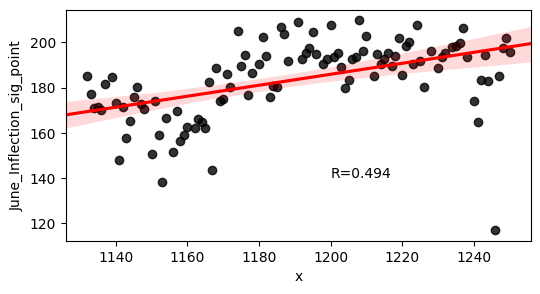

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

SI_18_Raw_spatial_corrected_L=SI_19_Raw_spatial_corrected_L


plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'], SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point']
)
plt.text(
    1200,
    140,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
sns.regplot(
    x=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['x'],
    y=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==1]['June_Inflection_sig_point'],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
#handel.set(xticklabels=[])  # remove the tick labels

# Bed 2

<AxesSubplot:xlabel='x', ylabel='June_Inflection_sig_point'>

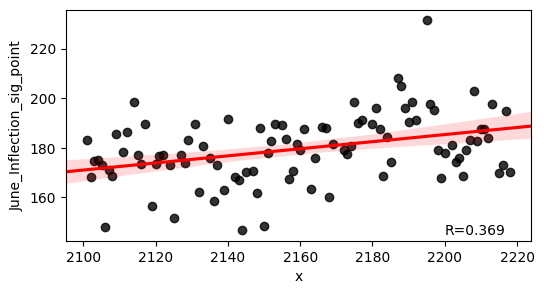

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.figure(figsize=(6, 3))
slope, intercept, r_value, p_value, std_err = stats.linregress(
    SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'], SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['June_Inflection_sig_point']
)
plt.text(
    2200,
    145,
    "R=" + str(round(r_value, 3)),
    horizontalalignment="left",
    size="medium",
    color="black",
)
sns.regplot(
    x=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['x'],
    y=SI_18_Raw_spatial_corrected_L[SI_18_Raw_spatial_corrected_L['bed']==2]['June_Inflection_sig_point'],
    color="red",
    truncate=False,
    scatter_kws={"color": "black"},
    line_kws={"color": "red"},
)
#handel.set(xticklabels=[])  # remove the tick labels

In [56]:
SI_19_Raw_spatial_corrected_L.drop('ID',axis=1,inplace=True)

In [57]:
from RadiMaxML import SpatialCorrection

SI_19_Raw_spatial_corrected_Done = SpatialCorrection(
    SI_19_Raw_spatial_corrected_L.copy(), "L"
)  # L for Linear


 Linear correction: Done


In [58]:
SI_19_Raw_spatial_corrected_Done_ML=SI_19_Raw_spatial_corrected_Done.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','Delta_15N','Log_Delta_15N','Delta_13C','x']]

In [59]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10, None
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [100,200,500,1000],
        "max_features": [5, 10, None],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    SI_19_Raw_spatial_corrected_Done_ML.copy(), RF_models_param_grid, "RF"
)

 
Delta_15N RF
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 0, R train 0.84 test -0.12
{'max_depth': 5, 'max_features': None, 'n_estimators': 200}
Fold 1, R train 0.79 test 0.49
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 2, R train 0.78 test 0.20
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 3, R train 0.83 test -0.23
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 4, R train 0.82 test 0.02
Full test r 0.02
 
Log_Delta_15N RF
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 0, R train 0.76 test -0.02
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 1, R train 0.76 test 0.35
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 2, R train 0.77 test -0.11
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 3, R train 0.75 test -0.31
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 4, R train 0.73 test -0.09
Full test r -0.11
 
Delta_13C RF
{'max_depth': 5,

In [60]:
pval

,RF
Delta_15N,0.806433
Log_Delta_15N,0.136803
Delta_13C,0.523099


In [61]:
LDF_Raw_Full_test_r

,RF
Delta_15N,0.017434
Log_Delta_15N,-0.105571
Delta_13C,-0.045415


In [62]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from RadiMaxML import ML_NCV

RF_models_param_grid = [
    {  # corresponding to RandomForestRegressor
        "max_depth": [
            5,
            10, None
        ],  # If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        "n_estimators": [100,200,500,1000],
        "max_features": [5, 10, None],  # If None, then max_features=n_features.
    }
]
LDF_Raw_Full_test_r, Fim_raw, pval, _ = ML_NCV(
    SI_19_Raw_spatial_corrected_Done_ML.copy(), RF_models_param_grid, "GB"
)

 
Delta_15N GB
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 0, R train 0.99 test -0.08
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 1, R train 0.99 test 0.37
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 2, R train 0.99 test 0.19
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 3, R train 0.99 test -0.25
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 4, R train 0.99 test 0.00
Full test r 0.01
 
Log_Delta_15N GB
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}
Fold 0, R train 0.99 test -0.01
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 1, R train 0.99 test 0.25
{'max_depth': 5, 'max_features': None, 'n_estimators': 100}
Fold 2, R train 0.99 test -0.12
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 3, R train 0.99 test -0.24
{'max_depth': 5, 'max_features': 10, 'n_estimators': 100}
Fold 4, R train 0.99 test 0.04
Full test r -0.05
 
Delta_13C GB
{'max_dept

In [63]:
pval

,GB
Delta_15N,0.895169
Log_Delta_15N,0.484237
Delta_13C,0.408909


In [16]:
import pandas as pd
import numpy as np
# 2018
DF_Raw=pd.read_csv('RL_Designed_feature_2018.csv',index_col='Unnamed: 0')
DF_SR=pd.read_csv('Square_root_RL_Designed_feature_2018.csv',index_col='Unnamed: 0')

In [17]:
DF_SR1=DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','x','bed','Delta_15N','Delta_13C','Log_Delta_15N']]

In [18]:
from RadiMaxML import SpatialCorrection
from RadiMaxML import ML_NCV
DF_SQ_spatial_corrected_L=SpatialCorrection(DF_SR1.copy(),'L')# L for Linear

#PLDF_Raw_Full_test_r,_= ML_NCV(DF_Raw_spatial_corrected_PL.copy())


 Linear correction: Done


In [19]:
DF_SR['Log_Delta_15N']=DF_SQ_spatial_corrected_L['Log_Delta_15N']

In [20]:
DF_SR['Delta_13C']=DF_SQ_spatial_corrected_L['Delta_13C']

0.027160451225424063 -4.650762659506904 0.3082590087440933 2.0251861664546467e-07


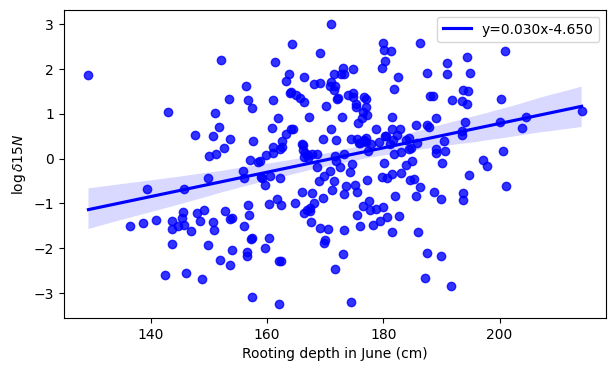

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log  \delta 15N$')
#plt.text(160, 2, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

-0.010824611882805446 1.8535296166612292 -0.2562431055839135 1.817704684227331e-05


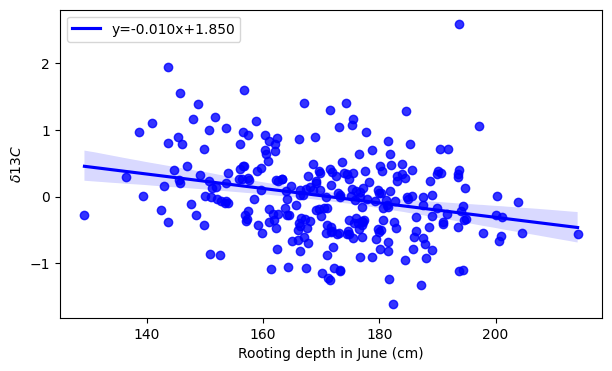

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x+{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')
#plt.text(160, 2, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()


In [28]:
DF_Raw=pd.read_csv('RL_Designed_feature_2019.csv',index_col='Unnamed: 0')
DF_SR=pd.read_csv('Square_root_RL_Designed_feature_2019.csv',index_col='Unnamed: 0')


In [29]:
DF_SR1=DF_SR.loc[:,['May_Inflection_sig_point','June_Inflection_sig_point','July_Inflection_sig_point','x','bed','Delta_15N','Delta_13C','Log_Delta_15N']]

In [30]:
from RadiMaxML import SpatialCorrection
from RadiMaxML import ML_NCV
DF_SQ_spatial_corrected_L=SpatialCorrection(DF_SR1.copy(),'L')# L for Linear

#PLDF_Raw_Full_test_r,_= ML_NCV(DF_Raw_spatial_corrected_PL.copy())


 Linear correction: Done


In [31]:
DF_SR['Log_Delta_15N']=DF_SQ_spatial_corrected_L['Log_Delta_15N']

In [32]:
DF_SR['Delta_13C']=DF_SQ_spatial_corrected_L['Delta_13C']

0.0073696094232391495 -1.3391291489334876 0.1469475823782677 0.03785585029503501


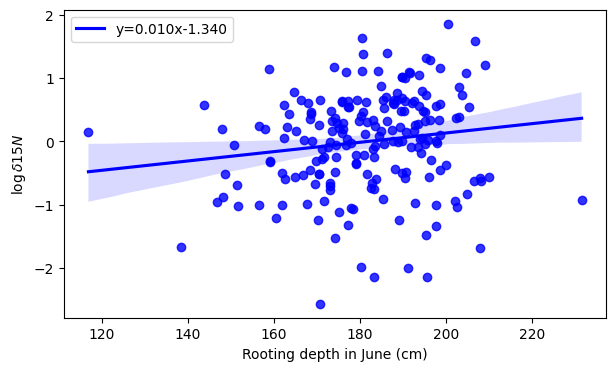

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Log_Delta_15N'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Log_Delta_15N", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\log  \delta 15N$')
#plt.text(160, 2, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()

0.0012131695463795597 -0.22044461366328838 0.051157552881233165 0.4718861789094224


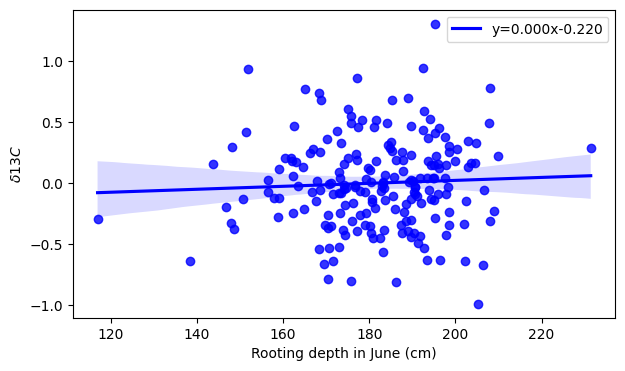

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#tips = sns.load_dataset("tips") # get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(DF_SR['June_Inflection_sig_point'],DF_SR['Delta_13C'])
print(slope, intercept,r_value, p_value)
plt.figure(figsize=(7, 4))
#use line_kws to set line label for legend
ax = sns.regplot(x="June_Inflection_sig_point", y="Delta_13C", data=DF_SR, color='b',line_kws={'label':"y={0:.3f}x{1:.3f}".format(np.round(slope,2),np.round(intercept,2))})
ax.set(xlabel='Rooting depth in June (cm)', ylabel=r'$\delta 13C$')
#plt.text(160, 2, "R="+str(round(r_value,3)), horizontalalignment='left', size='medium', color='black')
ax.legend()
#plt.savefig('Delta13C_May_2018.png',dpi=500,bbox_inches = 'tight')
plt.show()